In [2]:
import numpy as np
import pandas as pd

# Define the number of samples and features
num_samples = 1000
num_features = 20

# Generate random molecular features (e.g., fingerprints, embeddings)
X = np.random.rand(num_samples, num_features)

# Generate random binary labels indicating molecular interactions
y = np.random.randint(2, size=num_samples)

# Create a DataFrame to store the features and labels
data = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(num_features)])
data['label'] = y

# Display the first few rows of the dataset
print(data.head())

# Save the dataset to a CSV file
data.to_csv('sample_molecular_interaction_data.csv', index=False)


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.343881   0.549500   0.240347   0.093692   0.214307   0.686421   
1   0.792099   0.619859   0.615000   0.689517   0.694639   0.008043   
2   0.406632   0.115538   0.263571   0.935249   0.956263   0.622736   
3   0.025441   0.923128   0.341607   0.410835   0.015874   0.147483   
4   0.476147   0.058792   0.169057   0.596386   0.801321   0.033611   

   feature_7  feature_8  feature_9  feature_10  ...  feature_12  feature_13  \
0   0.231183   0.322250   0.060098    0.952433  ...    0.822534    0.719592   
1   0.047027   0.561270   0.890119    0.716309  ...    0.228466    0.022309   
2   0.918675   0.486800   0.799013    0.972769  ...    0.994262    0.407083   
3   0.673053   0.481402   0.019579    0.350969  ...    0.856547    0.825318   
4   0.304763   0.551311   0.998322    0.136097  ...    0.693500    0.784139   

   feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  \
0    0.819353    0.25

Epoch 1/10


/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4944 - loss: 0.7094 - val_accuracy: 0.5688 - val_loss: 0.6901
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 0.7030 - val_accuracy: 0.5125 - val_loss: 0.6907
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5176 - loss: 0.7017 - val_accuracy: 0.5250 - val_loss: 0.6898
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5540 - loss: 0.6947 - val_accuracy: 0.4812 - val_loss: 0.6909
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5555 - loss: 0.6868 - val_accuracy: 0.5562 - val_loss: 0.6891
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5305 - loss: 0.6948 - val_accuracy: 0.5188 - val_loss: 0.6900
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5438 - loss: 0.6907 - val_accuracy: 0.5250 - val_loss: 0.6896
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5699 - loss: 0.6809 - val_accuracy: 0.5437 - val_loss: 0.6900
Ep

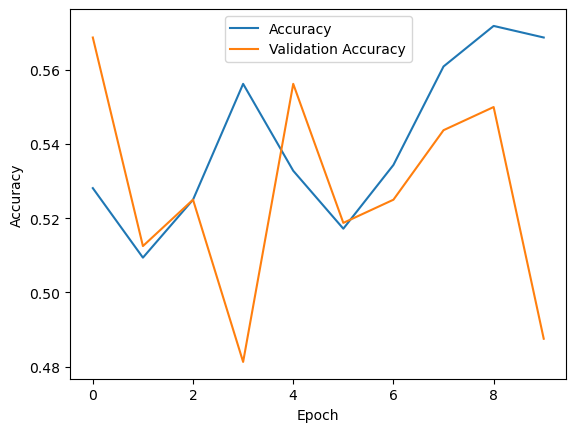

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load and preprocess the dataset
# Assuming you have a dataset with features and labels
# X: molecular features (e.g., fingerprints, embeddings)
# y: binary labels indicating molecular interactions

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the deep learning model architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save("molecular_interaction_prediction_model.h5")
